In [ ]:
from sklearn import preprocessing, metrics, tree, ensemble
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
from numpy import mean, std
import pickle
from collections import Counter
#-----------------------------------------------------------
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, make_scorer, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
#-----------------------------------------------------------
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
df = pd.read_csv('/content/ALL_orig_order.csv', usecols=['gender','apex1','apex2','height','Index','age_group'])
df

**Pre-processing**

In [ ]:
#encode gender only
'''
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])
'''

'\nle = LabelEncoder()\nX[:,0] = le.fit_transform(X[:,0])\n'

In [ ]:
col=['gender','age_group']
df[col] = df[col].apply(LabelEncoder().fit_transform)

In [ ]:
X = df.iloc[:, [0, 1, 2, 3, 4]].values
y = df.iloc[:, -1].values

In [ ]:
df['age_group'].value_counts() #Adult:0 TOTAL 286, Minor:1 TOTAL 201

0    286
1    201
Name: age_group, dtype: int64

In [ ]:
df['gender'].value_counts() #M:1 TOTAL 231, F:0 TOTAL256

0    256
1    231
Name: gender, dtype: int64

In [ ]:
#random_state
seed= 42

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=seed,stratify=y) 

In [ ]:
print(Counter(y))
print(Counter(y_train))
print(Counter(y_test))

In [ ]:
#feature Scaling  -- applided for all classifiers because no change was observed in the scores for algorithms that does not need scalling 
scaler = StandardScaler()    
X_train = scaler.fit_transform(X_train)    
X_test = scaler.transform(X_test)  

In [ ]:
# Decision Tree
dt = DecisionTreeClassifier(max_depth=4, random_state=seed)
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)
dt_acc = accuracy_score(y_test,y_pred_dt)
dt_report = classification_report(y_test, y_pred_dt)

# Random Forest
rf = RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=300,random_state=seed)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
rf_acc = accuracy_score(y_test,y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf)

# Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(solver='svd')
lda.fit(X_train, y_train)
y_pred_lda=lda.predict(X_test)
lda_acc=accuracy_score(y_test,y_pred_lda)
lda_report=classification_report(y_test,y_pred_lda)

# Gradient Boosting
gb = GradientBoostingClassifier(max_depth=6, n_estimators=200)
gb.fit(X_train, y_train)
y_pred_gb=gb.predict(X_test)
gb_acc=accuracy_score(y_test,y_pred_gb)
gb_report=classification_report(y_test,y_pred_gb)

# Logistic Regression
lr = LogisticRegression(solver='liblinear', random_state=seed)
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
lr_acc = accuracy_score(y_test,y_pred_lr)
lr_report = classification_report(y_test, y_pred_lr)

In [ ]:
# algorithms needs scaling  ---------------------------------------

# Support Vector Machine
svm = SVC(C=1, kernel='linear',probability=True,random_state=seed)
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)
svm_acc = accuracy_score(y_test,y_pred_svm)
svm_report = classification_report(y_test, y_pred_svm)

# k-nearest neighbors
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
knn_acc = accuracy_score(y_test,y_pred_knn)
knn_report = classification_report(y_test, y_pred_knn)

# Neural Network
nn = MLPClassifier(max_iter=2000,random_state=seed)
nn.fit(X_train,y_train)
y_pred_nn = nn.predict(X_test)
nn_acc = accuracy_score(y_test,y_pred_nn)
nn_report = classification_report(y_test, y_pred_nn)

In [ ]:
pd.DataFrame({"Algorithm":["Decision Tree","Random Forest","Linear Discriminant Analysis","Gradient Boosting","Logistic Regression","Support Vector Machine","k-nearest neighbors","Neural Network"],
              "Accuracy Score":[dt_acc,rf_acc,lda_acc,gb_acc,lr_acc,svm_acc,knn_acc,nn_acc]})

,Algorithm,Accuracy Score
0,Decision Tree,0.816327
1,Random Forest,0.826531
2,Linear Discriminant Analysis,0.846939
3,Gradient Boosting,0.826531
4,Logistic Regression,0.846939
5,Support Vector Machine,0.806122
6,k-nearest neighbors,0.836735
7,Neural Network,0.826531


In [ ]:
conf_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix: DT")
print(conf_dt)
print("\nClassification Report: Decision Tree",)
print (dt_report)
print("Accuracy on training set: {:.4f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(dt.score(X_test, y_test)))
print("f1: {:.4f}".format(f1_score(y_test, y_pred_dt, average='binary')))
print("precision_score: {:.4f}".format(precision_score(y_test, y_pred_dt, average='binary')))
print("recall_score: {:.4f}".format(recall_score(y_test, y_pred_dt, average='binary')))
print("specificity: {:.4f}".format(recall_score(y_test, y_pred_dt,pos_label=0)))
print("AUC: {:.4f}".format(roc_auc_score(y_test, y_pred_dt)))

print("----------------------------------------------------------------------")

conf_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix: RF")
print(conf_rf)
print("\nClassification Report: Random Forest",)
print (rf_report)
print("Accuracy on training set: {:.4f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(rf.score(X_test, y_test)))
print("f1: {:.4f}".format(f1_score(y_test, y_pred_rf, average='binary')))
print("precision_score: {:.4f}".format(precision_score(y_test, y_pred_rf, average='binary')))
print("recall_score: {:.4f}".format(recall_score(y_test, y_pred_rf, average='binary')))
print("specificity: {:.4f}".format(recall_score(y_test, y_pred_rf,pos_label=0)))
print("----------------------------------------------------------------------")

conf_lda = confusion_matrix(y_test, y_pred_lda)
print("\nConfusion Matrix: LDA")
print(conf_lda)
print("\nClassification Report:Linear Discriminant Analysis",)
print (lda_report)
print("Accuracy on training set: {:.4f}".format(lda.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(lda.score(X_test, y_test)))
print("f1: {:.4f}".format(f1_score(y_test, y_pred_lda, average='binary')))
print("precision_score: {:.4f}".format(precision_score(y_test,y_pred_lda, average='binary')))
print("recall_score: {:.4f}".format(recall_score(y_test, y_pred_lda, average='binary')))
print("specificity: {:.4f}".format(recall_score(y_test, y_pred_lda,pos_label=0)))
print("----------------------------------------------------------------------")

conf_gb = confusion_matrix(y_test, y_pred_gb)
print("\nConfusion Matrix: GB")
print(conf_gb)
print("\nClassification Report: Gradient Boosting",)
print (gb_report)
print("Accuracy on training set: {:.4f}".format(gb.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(gb.score(X_test, y_test)))
print("f1: {:.4f}".format(f1_score(y_test, y_pred_gb, average='binary')))
print("precision_score: {:.4f}".format(precision_score(y_test,y_pred_gb, average='binary')))
print("recall_score: {:.4f}".format(recall_score(y_test, y_pred_gb, average='binary')))
print("specificity: {:.4f}".format(recall_score(y_test, y_pred_gb,pos_label=0)))
print("----------------------------------------------------------------------")

conf_lr = confusion_matrix(y_test, y_pred_lr)
print("\nConfusion Matrix: LR")
print(conf_lr)
print("\nClassification Report: Logistic Regression",)
print (lr_report)
print("Accuracy on training set: {:.4f}".format(lr.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(lr.score(X_test, y_test)))
print("f1: {:.4f}".format(f1_score(y_test, y_pred_lr, average='binary')))
print("precision_score: {:.4f}".format(precision_score(y_test,y_pred_lr, average='binary')))
print("recall_score: {:.4f}".format(recall_score(y_test, y_pred_lr, average='binary')))
print("specificity: {:.4f}".format(recall_score(y_test, y_pred_lr,pos_label=0)))
print("----------------------------------------------------------------------")

#----------------------------------------------------------------------

conf_svm = confusion_matrix(y_test, y_pred_svm)
print("\nConfusion Matrix: SVM")
print(conf_svm)
print("\nClassification Report: Support Vector Machine",)
print (svm_report)
print("Accuracy on training set: {:.4f}".format(svm.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(svm.score(X_test, y_test)))
print("f1: {:.4f}".format(f1_score(y_test, y_pred_svm, average='binary')))
print("precision_score: {:.4f}".format(precision_score(y_test,y_pred_svm, average='binary')))
print("recall_score: {:.4f}".format(recall_score(y_test, y_pred_svm, average='binary')))
print("specificity: {:.4f}".format(recall_score(y_test, y_pred_svm,pos_label=0)))
print("----------------------------------------------------------------------")

conf_knn = confusion_matrix(y_test, y_pred_knn)
print("\nConfusion Matrix: KNN")
print(conf_knn)
print("\nClassification Report: k-nearest neighbors",)
print(knn_report)
print("Accuracy on training set: {:.4f}".format(knn.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(knn.score(X_test, y_test)))
print("f1: {:.4f}".format(f1_score(y_test,y_pred_knn, average='binary')))
print("precision_score: {:.4f}".format(precision_score(y_test,y_pred_knn, average='binary')))
print("recall_score: {:.4f}".format(recall_score(y_test, y_pred_knn, average='binary')))
print("specificity: {:.4f}".format(recall_score(y_test, y_pred_knn,pos_label=0)))
print("----------------------------------------------------------------------")

conf_nn = confusion_matrix(y_test, y_pred_nn)
print("\nConfusion Matrix: NN")
print(conf_nn)
print("\nClassification Report: Neural Network",)
print (nn_report)
print("Accuracy on training set: {:.4f}".format(nn.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(nn.score(X_test, y_test)))
print("f1: {:.4f}".format(f1_score(y_test, y_pred_nn)))#, average='binary'
print("precision_score: {:.4f}".format(precision_score(y_test,y_pred_nn)))#
print("recall_score: {:.4f}".format(recall_score(y_test, y_pred_nn)))#
print("specificity: {:.4f}".format(recall_score(y_test, y_pred_nn,pos_label=0)))
print("----------------------------------------------------------------------")

Confusion Matrix: DT
[[43 15]
 [ 3 37]]

Classification Report: Decision Tree
              precision    recall  f1-score   support

           0       0.93      0.74      0.83        58
           1       0.71      0.93      0.80        40

    accuracy                           0.82        98
   macro avg       0.82      0.83      0.82        98
weighted avg       0.84      0.82      0.82        98

Accuracy on training set: 0.8972
Accuracy on test set: 0.8163
f1: 0.8043
precision_score: 0.7115
recall_score: 0.9250
specificity: 0.7414
AUC: 0.8332
----------------------------------------------------------------------

Confusion Matrix: RF
[[44 14]
 [ 3 37]]

Classification Report: Random Forest
              precision    recall  f1-score   support

           0       0.94      0.76      0.84        58
           1       0.73      0.93      0.81        40

    accuracy                           0.83        98
   macro avg       0.83      0.84      0.83        98
weighted avg       0.85

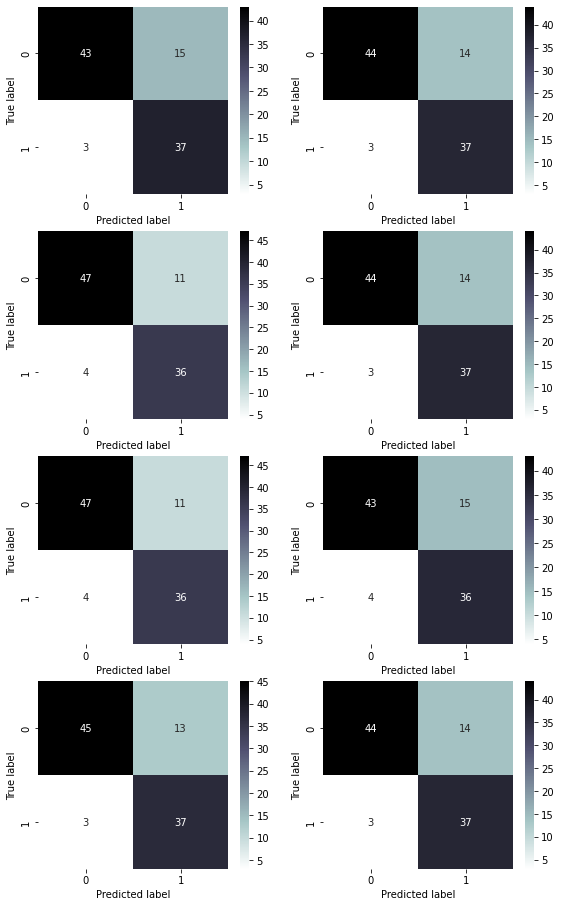

In [ ]:
fig=plt.figure(figsize=(40,20),facecolor='white')
gs=fig.add_gridspec(5,8)
ax=[None for i in range(8)]
ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[0,1])
ax[2]=fig.add_subplot(gs[1,0])
ax[3]=fig.add_subplot(gs[1,1])
ax[4]=fig.add_subplot(gs[2,0])
ax[5]=fig.add_subplot(gs[2,1])
ax[6]=fig.add_subplot(gs[3,0])
ax[7]=fig.add_subplot(gs[3,1])



conf_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(conf_dt, annot=True, ax = ax[0], fmt = 'g' ,cmap=plt.cm.bone_r)

conf_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_rf, annot=True, ax = ax[1], fmt = 'g' ,cmap=plt.cm.bone_r)

conf_lda = confusion_matrix(y_test, y_pred_lda)
sns.heatmap(conf_lda, annot=True, ax = ax[2], fmt = 'g' ,cmap=plt.cm.bone_r)

conf_gb = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(conf_gb, annot=True, ax = ax[3], fmt = 'g' ,cmap=plt.cm.bone_r)

conf_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(conf_lr, annot=True, ax = ax[4], fmt = 'g' ,cmap=plt.cm.bone_r)

conf_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_svm, annot=True, ax = ax[5], fmt = 'g' ,cmap=plt.cm.bone_r)

conf_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_knn, annot=True, ax = ax[6], fmt = 'g' ,cmap=plt.cm.bone_r)

conf_nn = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(conf_nn, annot=True, ax = ax[7], fmt = 'g' ,cmap=plt.cm.bone_r)

title=["Decision Tree","Random Forest","Linear Discriminant Analysis","Gradient Boosting","Logistic Regression","Support Vector Machine","k-nearest neighbors","Neural Network"]

for i in range(8):
  #ax[i].text(title[i]) #error while adding the title!
  ax[i].set_xlabel('Predicted label')
  ax[i].set_ylabel('True label')
  
  for direction in ['top','right','left']:
    ax[i].spines[direction].set_visible(False)

In [ ]:
#checking the correct order of the Confusion Matrix
list(zip(['tn', 'fp', 'fn', 'tp'],np.array([[47,9], [4,38]]).ravel()))

[('tn', 47), ('fp', 9), ('fn', 4), ('tp', 38)]

The correct axes of confusion matrix according to sklearn.
Ref:


*   [sklearn.metrics.confusion_matrixt](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
*   [Understanding the Confusion Matrix from Scikit learn](https://towardsdatascience.com/understanding-the-confusion-matrix-from-scikit-learn-c51d88929c79)



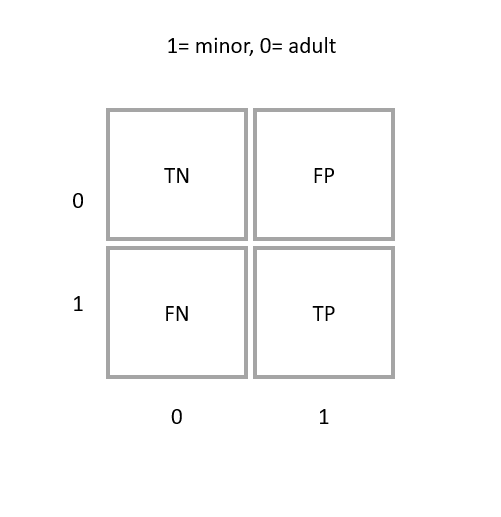

Text(0.5, 1.0, 'Multi-layer Perceptron')

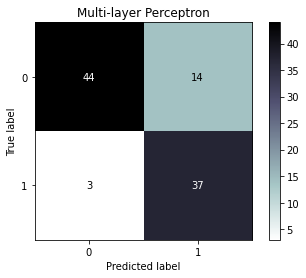

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nn,cmap='bone_r') 
plt.title('Multi-layer Perceptron')

Text(0.5, 1.0, 'k-nearest neighbors')

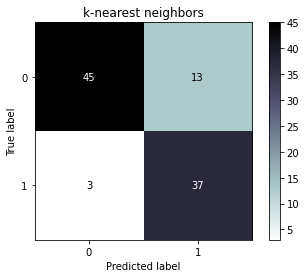

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn,cmap='bone_r') 
plt.title('k-nearest neighbors')

Text(0.5, 1.0, 'Decision Tree')

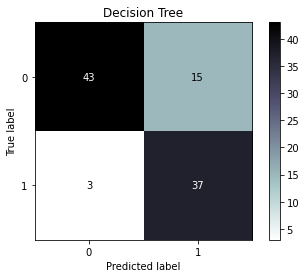

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt,cmap='bone_r') 
plt.title('Decision Tree')

Text(0.5, 1.0, 'Random Forest')

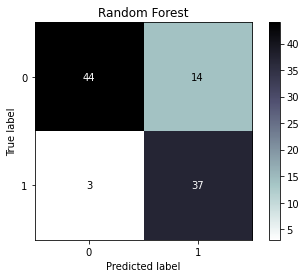

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf,cmap='bone_r') 
plt.title('Random Forest')

Text(0.5, 1.0, 'Logistic Regression')

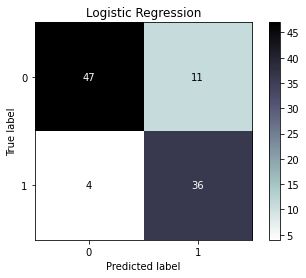

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr,cmap='bone_r') 
plt.title('Logistic Regression')

Text(0.5, 1.0, 'Support Vector Machine')

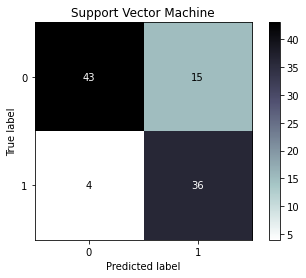

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm,cmap='bone_r') 
plt.title('Support Vector Machine')

Text(0.5, 1.0, 'Gradient Boosting')

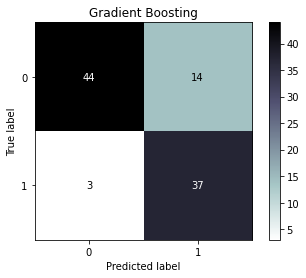

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_gb,cmap='bone_r') 
plt.title('Gradient Boosting')

Text(0.5, 1.0, 'Linear Discriminant Analysis')

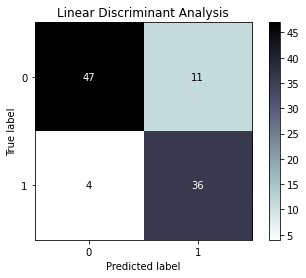

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lda,cmap='bone_r') 
plt.title('Linear Discriminant Analysis')

ROC Curve
[REF](https://www.imranabdullah.com/2019-06-01/Drawing-multiple-ROC-Curves-in-a-single-plot)

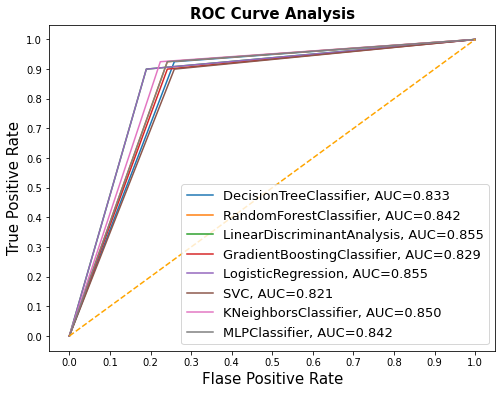

In [ ]:
# plot the hard class prediction "predict" - not used

#All algorithms initialized already on the previous steps
classifiers = [dt, 
               rf, 
               lda, 
               gb,
               lr,
               svm,
               knn,
               nn]


result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])


for cls in classifiers:
    model = cls.fit(X_train, y_train)
    proba = model.predict(X_test)
    
    fpr, tpr, _ = roc_curve(y_test,  proba)
    auc = metrics.auc(fpr, tpr)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)


result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

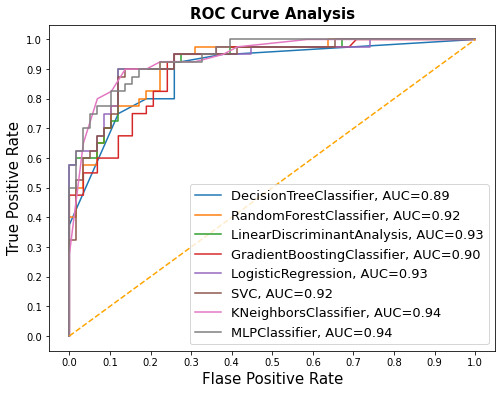

In [ ]:
# plot predicted probabilities "predict_proba"

from sklearn.metrics import roc_curve, auc

classifiers = [dt, 
               rf, 
               lda, 
               gb,
               lr,
               svm,
               knn,
               nn]


result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])


for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[:,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = metrics.auc(fpr, tpr)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)


result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.2f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

Area under the ROC curve : 0.938362


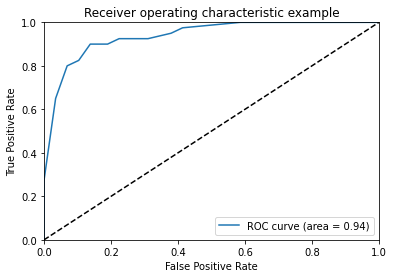

In [ ]:
# plot single model class probabilities

classifier = knn
probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)

# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = metrics.auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc) 

# Plot ROC curve
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Cross validation

In [ ]:
models = []
models.append(('Decision Tree', dt))
models.append(('Random Forest', rf))
models.append(('Linear Discriminant Analysis', lda))
models.append(('Gradient Boosting', gb))
models.append(('Logistic Regression', lr))
models.append(('SVM', svm))
models.append(('K Neighbors Classifier', knn))
models.append(('Neural Network', nn))

In [ ]:
cv = KFold(n_splits=10, shuffle=True,random_state=seed)

In [ ]:
# accuracy
results_boxplot = []
names = []
results_mean = []
results_std = []
p,t = X_train, y_train.ravel()
for name, model in models:
    cv_results = cross_val_score(model, p,t, cv=cv,scoring='accuracy')
    results_boxplot.append(cv_results)
    results_mean.append(cv_results.mean())
    results_std.append(cv_results.std())
    names.append(name)
pd.DataFrame({"Algorithm":names,
                                "Accuracy Mean":results_mean,
                                "std":results_std})

,Algorithm,Accuracy Mean,std
0,Decision Tree,0.827665,0.061049
1,Random Forest,0.843252,0.034994
2,Linear Discriminant Analysis,0.835425,0.057707
3,Gradient Boosting,0.848178,0.042771
4,Logistic Regression,0.835425,0.058836
5,SVM,0.837989,0.054022
6,K Neighbors Classifier,0.866329,0.048354
7,Neural Network,0.853441,0.050126


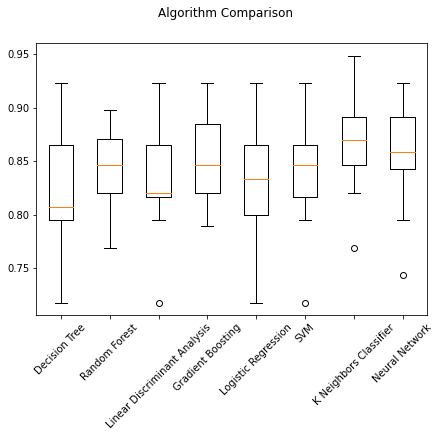

In [ ]:
fig = plt.figure(figsize=(7,5))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(1,1,1)
plt.boxplot(results_boxplot)
ax.set_xticklabels(names)
plt.xticks(rotation=45)
plt.xlabel('Method')
plt.ylabel('Total Accuracy')

plt.show()

[REF](https://github.com/josetvrs/Stroke_prediction)

In [ ]:
# recall
results_boxplot = []
names = []
results_mean = []
results_std = []
p,t = X_train, y_train.ravel()
for name, model in models:
    cv_results = cross_val_score(model, p,t, cv=cv,scoring='recall')#sensitivity
    results_boxplot.append(cv_results)
    results_mean.append(cv_results.mean())
    results_std.append(cv_results.std())
    names.append(name)
pd.DataFrame({"Algorithm":names,
                                "recall Mean":results_mean,
                                "std":results_std})

,Algorithm,recall Mean,std
0,Decision Tree,0.794892,0.124627
1,Random Forest,0.816254,0.069352
2,Linear Discriminant Analysis,0.763830,0.120326
3,Gradient Boosting,0.831116,0.063758
4,Logistic Regression,0.758830,0.123862
5,SVM,0.794915,0.118434
6,K Neighbors Classifier,0.833589,0.095878
7,Neural Network,0.830999,0.111891


In [ ]:
# f1
results_boxplot = []
names = []
results_mean = []
results_std = []
p,t = X_train, y_train.ravel()
for name, model in models:
    cv_results = cross_val_score(model, p,t, cv=cv,scoring='f1')
    results_boxplot.append(cv_results)
    results_mean.append(cv_results.mean())
    results_std.append(cv_results.std())
    names.append(name)
pd.DataFrame({"Algorithm":names,
                                "f1 Mean":results_mean,
                                "std":results_std})

,Algorithm,f1 Mean,std
0,Decision Tree,0.780725,0.110861
1,Random Forest,0.805431,0.066422
2,Linear Discriminant Analysis,0.784785,0.103713
3,Gradient Boosting,0.826985,0.075099
4,Logistic Regression,0.784576,0.101816
5,SVM,0.793284,0.102048
6,K Neighbors Classifier,0.833764,0.074383
7,Neural Network,0.817617,0.086010


In [ ]:
# precision
results_boxplot = []
names = []
results_mean = []
results_std = []
p,t = X_train, y_train.ravel()
for name, model in models:
    cv_results = cross_val_score(model, p,t, cv=cv,scoring='precision')
    results_boxplot.append(cv_results)
    results_mean.append(cv_results.mean())
    results_std.append(cv_results.std())
    names.append(name)
pd.DataFrame({"Algorithm":names,
                                "precision Mean":results_mean,
                                "std":results_std})

,Algorithm,precision Mean,std
0,Decision Tree,0.772223,0.116417
1,Random Forest,0.798593,0.085110
2,Linear Discriminant Analysis,0.813456,0.109662
3,Gradient Boosting,0.809934,0.091578
4,Logistic Regression,0.820253,0.105560
5,SVM,0.798241,0.111142
6,K Neighbors Classifier,0.840408,0.085075
7,Neural Network,0.814550,0.106267


In [ ]:
# specificity
specificity = make_scorer(recall_score, pos_label=0)
results_boxplot = []
names = []
results_mean = []
results_std = []
p,t = X_train, y_train.ravel()
for name, model in models:
    cv_results = cross_val_score(model, p,t, cv=cv,scoring= specificity)
    results_boxplot.append(cv_results)
    results_mean.append(cv_results.mean())
    results_std.append(cv_results.std())
    names.append(name)
pd.DataFrame({"Algorithm":names,
                                "specificity Mean":results_mean,
                                "std":results_std})

,Algorithm,specificity Mean,std
0,Decision Tree,0.843037,0.069096
1,Random Forest,0.860759,0.042938
2,Linear Discriminant Analysis,0.881698,0.059281
3,Gradient Boosting,0.863989,0.059663
4,Logistic Regression,0.885486,0.060479
5,SVM,0.864885,0.058720
6,K Neighbors Classifier,0.890486,0.050277
7,Neural Network,0.869967,0.068659


In [ ]:
# roc_auc
results_boxplot = []
names = []
results_mean = []
results_std = []
p,t = X_train, y_train
for name, model in models:
    cv_results = cross_val_score(model, p,t, cv=cv,scoring='roc_auc')
    results_boxplot.append(cv_results)
    results_mean.append(cv_results.mean())
    results_std.append(cv_results.std())
    names.append(name)
pd.DataFrame({"Algorithm":names,
                                "roc_auc Mean":results_mean,
                                "std":results_std})

,Algorithm,roc_auc Mean,std
0,Decision Tree,0.882073,0.043994
1,Random Forest,0.925634,0.031487
2,Linear Discriminant Analysis,0.920527,0.047429
3,Gradient Boosting,0.916224,0.034156
4,Logistic Regression,0.920332,0.040450
5,SVM,0.917199,0.043919
6,K Neighbors Classifier,0.922827,0.029033
7,Neural Network,0.928039,0.031433


cross_validate each model independently with the defined performance measures, just to check if the same scores will be returned like running diffrent models for a specific measure. 

In [ ]:

from sklearn.model_selection import cross_validate
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'sensitivity': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'precision': make_scorer(precision_score),
    'specificity': make_scorer(recall_score,pos_label=0),
    'roc_auc': make_scorer(roc_auc_score)
}


In [ ]:
#LDA
scores = cross_validate(lda, X_train,y_train, cv=cv,
                         scoring=scoring,
                        return_train_score=False)
sorted(scores.keys())


['fit_time',
 'score_time',
 'test_accuracy',
 'test_f1',
 'test_precision',
 'test_roc_auc',
 'test_sensitivity',
 'test_specificity']

In [ ]:
print('accuracy',scores['test_accuracy'].mean())
print('f1',scores['test_f1'].mean())
print('precision',scores['test_precision'].mean())
print('recall',scores['test_sensitivity'].mean())
print('specificity',scores['test_specificity'].mean())
#print('roc_auc',scores['test_roc_auc'].mean())

accuracy 0.8354251012145749
f1 0.7847845708321115
precision 0.8134562006620829
recall 0.7638302139037434
specificity 0.8816978078705768


In [ ]:
#DT
dt_scores = cross_validate(dt, X_train,y_train, cv=cv,
                         scoring=scoring,
                        return_train_score=False)
sorted(dt_scores.keys())

print('accuracy',dt_scores['test_accuracy'].mean())
print('f1',dt_scores['test_f1'].mean())
print('precision',dt_scores['test_precision'].mean())
print('recall',dt_scores['test_sensitivity'].mean())
print('specificity',dt_scores['test_specificity'].mean())


accuracy 0.8276653171390013
f1 0.7807246501134851
precision 0.7722228429465272
recall 0.7948923054070113
specificity 0.8430374464928241


In [ ]:
#RF
scores = cross_validate(rf, X_train,y_train, cv=cv,
                         scoring=scoring,
                        return_train_score=False)
sorted(scores.keys())

print('accuracy',scores['test_accuracy'].mean())
print('f1',scores['test_f1'].mean())
print('precision',scores['test_precision'].mean())
print('recall',scores['test_sensitivity'].mean())
print('specificity',scores['test_specificity'].mean())


accuracy 0.8432523616734142
f1 0.8054311251811251
precision 0.7985925267542915
recall 0.8162544563279857
specificity 0.8607590726927112


In [ ]:
#GB
scores = cross_validate(gb, X_train,y_train, cv=cv,
                         scoring=scoring,
                        return_train_score=False)
sorted(scores.keys())

print('accuracy',scores['test_accuracy'].mean())
print('f1',scores['test_f1'].mean())
print('precision',scores['test_precision'].mean())
print('recall',scores['test_sensitivity'].mean())
print('specificity',scores['test_specificity'].mean())


accuracy 0.8584345479082321
f1 0.8294286097511904
precision 0.8096696286169971
recall 0.8552064765300059
specificity 0.85963353156717


In [ ]:
#LR
scores = cross_validate(lr, X_train,y_train, cv=cv,
                         scoring=scoring,
                        return_train_score=False)
sorted(scores.keys())

print('accuracy',scores['test_accuracy'].mean())
print('f1',scores['test_f1'].mean())
print('precision',scores['test_precision'].mean())
print('recall',scores['test_sensitivity'].mean())
print('specificity',scores['test_specificity'].mean())


accuracy 0.8354251012145747
f1 0.7845757600350655
precision 0.8202527374586197
recall 0.7588302139037435
specificity 0.8854856866584555


In [ ]:
#SVM
scores = cross_validate(svm, X_train,y_train, cv=cv,
                         scoring=scoring,
                        return_train_score=False)
sorted(scores.keys())

print('accuracy',scores['test_accuracy'].mean())
print('f1',scores['test_f1'].mean())
print('precision',scores['test_precision'].mean())
print('recall',scores['test_sensitivity'].mean())
print('specificity',scores['test_specificity'].mean())


accuracy 0.8379892037786775
f1 0.7932844927950317
precision 0.7982405094905094
recall 0.7949145870469401
specificity 0.8648852725797805


In [ ]:
#KNN
scores = cross_validate(knn, X_train,y_train, cv=cv,
                         scoring=scoring,
                        return_train_score=False)
sorted(scores.keys())

print('accuracy',scores['test_accuracy'].mean())
print('f1',scores['test_f1'].mean())
print('precision',scores['test_precision'].mean())
print('recall',scores['test_sensitivity'].mean())
print('specificity',scores['test_specificity'].mean())


accuracy 0.8663292847503374
f1 0.8337640431235018
precision 0.8404075091575093
recall 0.8335888294711824
specificity 0.8904856866584556


In [ ]:
#MLP
scores = cross_validate(nn, X_train,y_train, cv=cv,
                         scoring=scoring,
                        return_train_score=False)
sorted(scores.keys())

print('accuracy',scores['test_accuracy'].mean())
print('f1',scores['test_f1'].mean())
print('precision',scores['test_precision'].mean())
print('recall',scores['test_sensitivity'].mean())
print('specificity',scores['test_specificity'].mean())


accuracy 0.8534412955465587
f1 0.8176173773517228
precision 0.8145501213612668
recall 0.8309989601901366
specificity 0.8699672710542277


In [ ]:
'''
Pkl_Filename = "rf_model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(rf, file)
'''

'\nPkl_Filename = "rf_model.pkl"  \n\nwith open(Pkl_Filename, \'wb\') as file:  \n    pickle.dump(rf, file)\n'